In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

# 데이터 준비 및 확인
- 기상자료개발포털>데이터>기상관측>지상>종관기상관측(ASOS)<br>
    https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36<br>
    회원가입/로그인필요<br>
    [자료형태]일자료<br>
    [지점]전체<br>
    [자료]기온>최저,최고,평균<br>
    [기간]1911~2020(10년단위로 나누어 다운로드)

## 데이터프레임 생성

In [3]:
df_1911 = pd.read_csv('../data/1911_1920_일별기온.csv', encoding='cp949')
df_1921 = pd.read_csv('../data/1921_1930_일별기온.csv', encoding='cp949')
df_1931 = pd.read_csv('../data/1931_1940_일별기온.csv', encoding='cp949')
df_1941 = pd.read_csv('../data/1941_1950_일별기온.csv', encoding='cp949')
df_1951 = pd.read_csv('../data/1951_1960_일별기온.csv', encoding='cp949')
df_1961 = pd.read_csv('../data/1961_1970_일별기온.csv', encoding='cp949')
df_1971 = pd.read_csv('../data/1971_1980_일별기온.csv', encoding='cp949')
df_1981 = pd.read_csv('../data/1981_1990_일별기온.csv', encoding='cp949')
df_1991 = pd.read_csv('../data/1991_2000_일별기온.csv', encoding='cp949')
df_2001 = pd.read_csv('../data/2001_2010_일별기온.csv', encoding='cp949')
df_2011 = pd.read_csv('../data/2011_2020_일별기온.csv', encoding='cp949')

In [4]:
# 데이트프레임 연결하기
df = pd.concat([df_1911, df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011]
              , ignore_index=True)

In [5]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5


In [6]:
df.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6
1597075,295,남해,2020-12-31,-1.3,-7.4,2.8


## 데이터 확인

In [7]:
df.shape

(1597076, 6)

In [8]:
df['지점명'].unique()

array(['강릉', '서울', '인천', '대구', '전주', '부산', '목포', '제주', '울릉도', '추풍령', '광주',
       '포항', '울산', '여수', '속초', '춘천', '수원', '서산', '청주', '대전', '군산', '통영',
       '서귀포', '진주', '임실', '정읍', '대관령', '원주', '충주', '울진', '안동', '완도', '성산',
       '강화', '양평', '이천', '인제', '홍천', '삼척', '제천', '보은', '천안', '보령', '부여',
       '금산', '부안', '남원', '고창군', '주암', '장흥', '해남', '고흥', '성산포', '영주', '문경',
       '영덕', '의성', '구미', '영천', '거창', '합천', '밀양', '산청', '거제', '남해', '철원',
       '관악산', '창원', '고산', '태백', '장수', '봉화', '동두천', '백령도', '동해', '영월',
       '무안', '흑산도', '파주', '북강릉', '상주', '고창', '진도(첨찰산)', '정선군', '영광군',
       '김해시', '순창군', '북창원', '양산시', '보성군', '강진군', '의령군', '함양군', '청송군',
       '경주시', '북춘천', '순천', '대구(기)', '홍성', '세종', '광양시', '진도군'],
      dtype=object)

In [9]:
df['지점명'].nunique()

102

## 데이터타입 확인/변경

In [11]:
df.dtypes

지점            int64
지점명          object
일시           object
평균기온(°C)    float64
최저기온(°C)    float64
최고기온(°C)    float64
dtype: object

In [12]:
df['일시']=pd.to_datetime(df['일시'])

In [13]:
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

## 2020년 지점별 기온 데이터 추출 및 전처리
### 2020sus 기온 데이터 추출하여 서브셋 만들기
- 조건으로 데이터를 추출한다.
- 필요한 컬럼을 추출한다.
- .copy()를 사용하여 카피본으로 서브셋을 만든다.

In [17]:
# 서브셋 만들기
df_2020 = df[df['일시'].dt.year==2020].copy()
df_2020

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1257373,90,속초,2020-01-01,0.8,-3.4,4.8
1257374,90,속초,2020-01-02,2.8,-2.1,6.6
1257375,90,속초,2020-01-03,4.7,0.8,8.5
1257376,90,속초,2020-01-04,4.0,1.1,8.1
1257377,90,속초,2020-01-05,3.1,-0.6,8.8
...,...,...,...,...,...,...
1597071,295,남해,2020-12-27,4.4,2.5,6.0
1597072,295,남해,2020-12-28,4.7,1.1,11.5
1597073,295,남해,2020-12-29,5.4,1.0,11.2
1597074,295,남해,2020-12-30,-3.0,-5.4,1.6


In [18]:
# 지점별 데이터 개수 카운트
df_2020['지점명'].value_counts()

광양시    366
이천     366
홍성     366
제주     366
대구     366
      ... 
철원     366
청송군    366
고산     366
북창원    365
진도군    364
Name: 지점명, Length: 95, dtype: int64

### 결측치 확인

In [20]:
# 컬럼별 결측치 개수 확인
df_2020.isnull().sum()

지점           0
지점명          0
일시           0
평균기온(°C)    36
최저기온(°C)     0
최고기온(°C)     1
dtype: int64

In [24]:
# 결측치 데이터 확인
df_2020[(df_2020['평균기온(°C)'].isnull()) | (df_2020['최고기온(°C)'].isnull())]

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1324913,130,울진,2020-08-23,NaN,22.1,27.9
1335898,135,추풍령,2020-09-18,NaN,13.8,23.7
1335905,135,추풍령,2020-09-25,NaN,11.6,23.6
1350354,140,군산,2020-04-15,NaN,4.7,17.0
1350584,140,군산,2020-12-01,NaN,-1.5,8.4
1394404,172,고창,2020-11-19,NaN,11.5,22.2
1397661,174,순천,2020-01-18,NaN,-1.7,4.1
1436214,211,인제,2020-02-20,NaN,-2.7,9.8
1447150,217,정선군,2020-01-30,NaN,-1.2,6.1
1461944,235,보령,2020-07-30,NaN,22.9,26.3


In [25]:
# 결측치가 있는 데이터의 지점별 카운팅
df_2020[(df_2020['평균기온(°C)'].isnull()) | (df_2020['최고기온(°C)'].isnull())].value_counts('지점명')

지점명
의령군    5
남원     3
함양군    3
해남     2
추풍령    2
군산     2
영덕     1
고창     1
광양시    1
구미     1
보령     1
북창원    1
순천     1
양산시    1
영천     1
영주     1
울진     1
의성     1
인제     1
임실     1
정선군    1
정읍     1
진도군    1
청송군    1
거제     1
dtype: int64

In [26]:
# 결측치 제거
df_2020.dropna(inplace=True)

In [27]:
# 결측치 잘 제거되었는지 확인
df_2020.isnull().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

In [28]:
# 지점별 데이터 개수 확인
df_2020['지점명'].value_counts()

경주시    366
고산     366
밀양     366
부산     366
동두천    366
      ... 
추풍령    364
남원     363
함양군    363
진도군    363
의령군    361
Name: 지점명, Length: 95, dtype: int64

# 지점별 연 평균기온 시각화
- 연 평균기온이 높은 지역은 어디일까?
- 연 평균기온이 낮은 지역은 어디일까?
- 서울의 연 평균기온은 전국에서 어느 정도 위치에 해당할까?

## 2020년 지점별 연 평균 기온 추출
- 지점별 일 평균기온의 평균 계산<br>
    지점명으로 그룹핑하여 일 평균기온의 평균 계산 

In [34]:
df_2020_mean=df_2020.groupby('지점명')['평균기온(°C)'].mean().sort_values(ascending=False)
df_2020_mean

지점명
서귀포    16.770219
제주     16.744809
고산     16.076503
성산     15.981148
북창원    15.206593
         ...    
철원     10.976776
제천     10.973497
봉화     10.821038
태백      9.631421
대관령     7.787978
Name: 평균기온(°C), Length: 95, dtype: float64

## 시각화

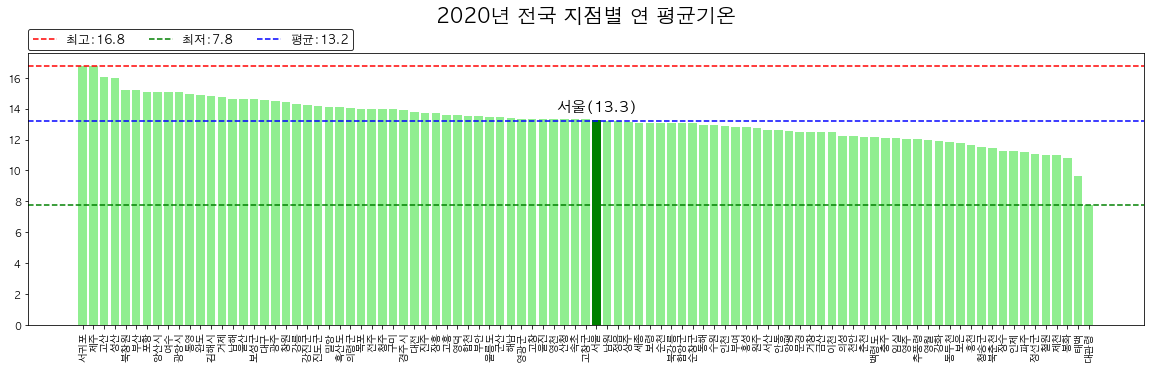

In [69]:
# 지점별 연 평균기온
plt.figure(figsize=(20,5))
plt.bar(df_2020_mean.index, df_2020_mean.values, color='lightgreen')
plt.xticks(rotation=90)

# 최고, 평균, 최저 라인 표시
plt.axhline(df_2020_mean.max(), color='r', ls='--', label='최고:'+str(round(df_2020_mean.max(),1)))
plt.axhline(df_2020_mean.min(), color='g', ls='--', label='최저:'+str(round(df_2020_mean.min(),1)))
plt.axhline(df_2020_mean.mean(), color='b', ls='--', label='평균:'+str(round(df_2020_mean.mean(),1)))
plt.legend(loc=(0, 1.01), ncol=3, fontsize=12, edgecolor='k')

# 서울지역표시
plt.bar('서울', df_2020_mean.loc['서울'], color='g')
plt.text('서울', df_2020_mean.loc['서울']+0.5, '서울('+str(round(df_2020_mean.loc['서울'],1))+')'
         , ha='center', fontsize=15)
plt.title('2020년 전국 지점별 연 평균기온', size=20, pad=30)

plt.show()